# PART I: EDA & Data Preprocessing on Google App Store Rating Dataset.

# QUESTION 1 : 
# Import required libraries and read the dataset. 

In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [655]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [656]:
df = pd.read_csv('Apps_data+(1).csv')
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# QUESTION  2 :
# Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [657]:
df.head(5) # Using head function instead os sample function , since it asked for first few samples

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [658]:
df.shape # shape indicates the  presence of 10841 rows and 13 columns

(10841, 13)

In [659]:
df.info() # Only one numerical column is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# QUESTION 3 :
# Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [660]:
df.describe() # Checking for summary statistics for numerical column

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [661]:
df.describe(include="all") # Checking for summary statistics for all the columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# QUESTION 4 :
# Check if there are any duplicate records in the dataset? if any drop them.

In [662]:
df.duplicated().sum() # Count of duplicate rows

483

In [663]:
df[df.duplicated()] # Displaying duplicate rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [664]:
df = df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [665]:
df.duplicated().sum()

0


# QUESTION 5 :
# Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them. 

In [666]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [667]:
df[df['Category']=='1.9'] # Row to be removed 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [668]:
df = df[df['Category']!='1.9']  # Code to remove the row
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# QUESTION 6 :
# Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [669]:
df['Rating'].isnull().sum()

1465

In [670]:
df = df.dropna(subset=['Rating'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [671]:
df['Rating'].isnull().sum()

0

In [672]:
def Rating_category(a):
    if a>3.5:
        return 'High'
    else:
        return 'Low'

In [673]:
df['Rating_category'] =  df['Rating'].map(Rating_category)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


# QUESTION  7 :
# Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

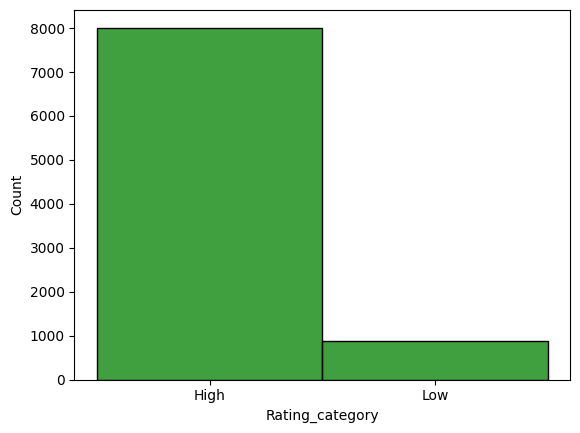

In [674]:
sns.histplot(x=df3['Rating_category'],color="green");

# COMMENT :
---> We can observe that most of the users have rated the apps above 3.5 and very less users have rated below 3.5

# QUESTION 8 :
# Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [675]:
df['Reviews'] = df['Reviews'].astype('int') # Converting into int data type

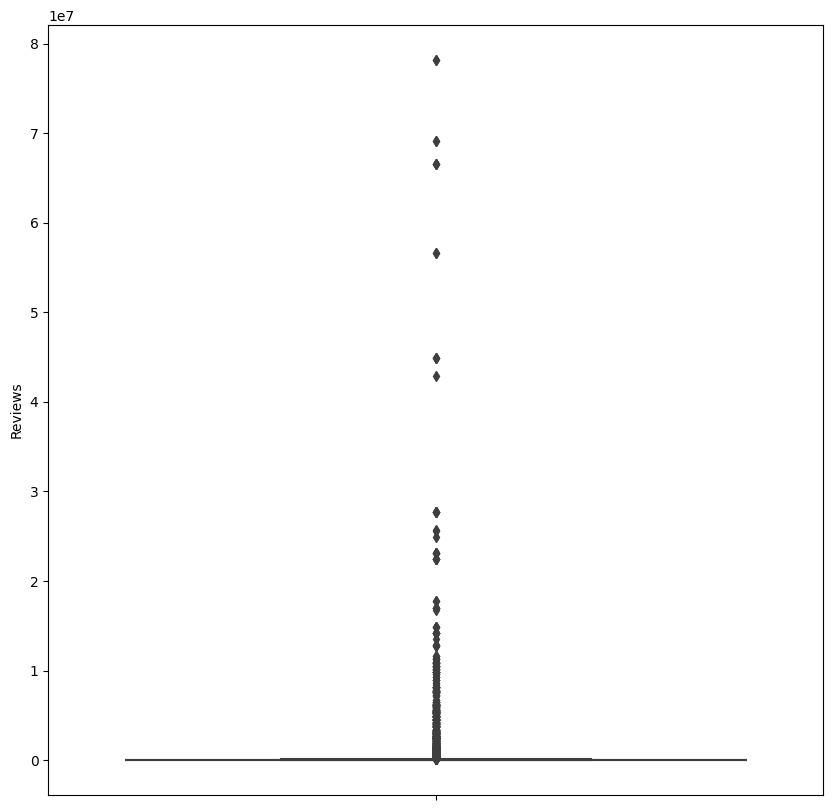

In [676]:
# Boxplot before outliers removal

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10));
sns.boxplot(y = df['Reviews']);

In [677]:
lg_tr = FunctionTransformer(np.log1p)

In [678]:
df['Reviews'] = pd.DataFrame(lg_tr.fit_transform(df['Reviews']))

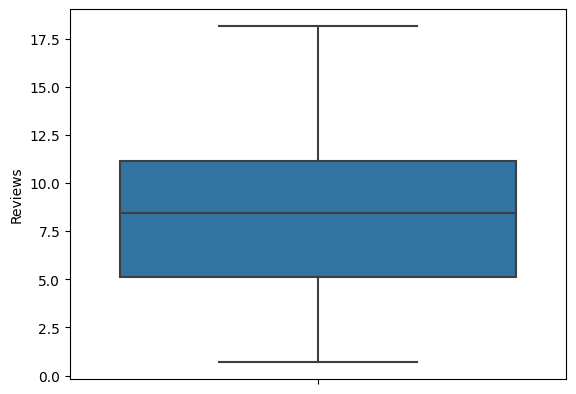

In [679]:
sns.boxplot(y=df['Reviews']);


# QUESTION 9 :
# The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [680]:
df['Size'].unique() 

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [681]:
df = df[df['Size']!='Varies with device']


In [682]:
df['Size'] = df['Size'].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [683]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,2.079442,2600000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High


# QUESTION 10 :
# Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [684]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [685]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# QUESTION 11 : 
# Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [686]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [687]:
df['Price'] = df['Price'].str.replace('$','').astype(float)

# QUESTION 12 :
# Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [688]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [689]:
df= df.drop(df[['App', 'Rating' , 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']],axis=1)
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2800000,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000,1000,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2600000,500,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000,5000,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3600000,100,Free,0.0,Everyone,High


# QUESTION 13 :
# Encode the categorical columns.

Before ordinal encoding the independent categorical columns, we shall label encode the target variable which makes the ordinal encoding easier

In [690]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [691]:
df['Rating_category'] = le.fit_transform(df['Rating_category'])

In [692]:
from sklearn.preprocessing import OrdinalEncoder
Oe = OrdinalEncoder()

In [693]:
catcols = df.select_dtypes(include = 'object').columns
df[catcols] = Oe.fit_transform(df[catcols])

In [694]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0.0,5.075174,19000000,10000,0.0,0.0,1.0,0
1,0.0,6.875232,14000000,500000,0.0,0.0,1.0,0
2,0.0,11.379520,8700000,5000000,0.0,0.0,1.0,0
3,0.0,12.281389,25000000,50000000,0.0,0.0,4.0,0
4,0.0,6.875232,2800000,100000,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
10833,3.0,3.806662,619000,1000,0.0,0.0,1.0,0
10834,11.0,2.079442,2600000,500,0.0,0.0,1.0,0
10836,11.0,3.663562,53000000,5000,0.0,0.0,1.0,0
10837,11.0,1.609438,3600000,100,0.0,0.0,1.0,0


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   float64
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   int32  
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   float64
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   float64
 7   Rating_category  7424 non-null   int32  
dtypes: float64(5), int32(3)
memory usage: 435.0 KB


# QUESTION 14 :
# Segregate the target and independent features (Hint: Use Rating_category as the target) 

In [700]:
Y = df[['Rating_category']] # Dependent Variable
X = df.drop('Rating_category',axis=1) # All independent Variable

In [701]:
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


In [702]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0.0,5.075174,19000000,10000,0.0,0.0,1.0
1,0.0,6.875232,14000000,500000,0.0,0.0,1.0
2,0.0,11.379520,8700000,5000000,0.0,0.0,1.0
3,0.0,12.281389,25000000,50000000,0.0,0.0,4.0
4,0.0,6.875232,2800000,100000,0.0,0.0,1.0
...,...,...,...,...,...,...,...
10833,3.0,3.806662,619000,1000,0.0,0.0,1.0
10834,11.0,2.079442,2600000,500,0.0,0.0,1.0
10836,11.0,3.663562,53000000,5000,0.0,0.0,1.0
10837,11.0,1.609438,3600000,100,0.0,0.0,1.0


# QUESTION 15 :
# Split the dataset into train and test.

In [706]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 555, stratify = Y )

In [707]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4360,14.0,5.717028,38000000,100000,0.0,0.00,1.0
4770,11.0,11.054028,11000000,1000000,0.0,0.00,1.0
7333,11.0,5.192957,14000000,50000,1.0,0.99,1.0
3332,29.0,10.431966,17000000,1000000,0.0,0.00,1.0
7664,11.0,3.737670,11000000,1000,0.0,0.00,1.0
...,...,...,...,...,...,...,...
590,7.0,10.468972,7200000,1000000,0.0,0.00,1.0
10445,6.0,9.618269,253000,1000000,0.0,0.00,1.0
7861,11.0,1.945910,5100000,1000,0.0,0.00,1.0
10549,14.0,12.617838,25000000,50000000,0.0,0.00,1.0


In [708]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1688,14.0,14.078252,78000000,50000000,0.0,0.0,1.0
1578,18.0,8.250620,23000000,1000000,0.0,0.0,1.0
7791,29.0,4.744932,18000000,5000,0.0,0.0,1.0
5643,14.0,7.589336,21000000,100000,0.0,0.0,4.0
6380,27.0,5.733341,454000,10000,0.0,0.0,1.0
...,...,...,...,...,...,...,...
3190,30.0,8.949755,40000000,1000000,0.0,0.0,1.0
9184,23.0,6.018593,6100000,100000,0.0,0.0,1.0
243,4.0,10.050873,41000000,1000000,0.0,0.0,1.0
8747,13.0,9.970305,41000000,1000000,0.0,0.0,1.0


In [709]:
Y_train

,Rating_category
4360,0
4770,0
7333,0
3332,0
7664,0
...,...
590,0
10445,0
7861,0
10549,0


In [710]:
Y_test 

,Rating_category
1688,0
1578,0
7791,0
5643,1
6380,0
...,...
3190,0
9184,0
243,0
8747,0


# QUESTION 16 :
# Standardize the data, so that the values are within a particular range.

In [712]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df = std_scaler.fit_transform(df)

In [715]:
df

array([[-2.03766618, -0.69434673, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.20638643, -0.37330014, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.01463714, -0.59947486, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.07700695,  1.29100439, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.63383939, -0.81711468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.42544875, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [716]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7
0,-2.037666,-0.694347,-0.159928,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.206386,-0.373300,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.014637,-0.599475,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.259116,0.096119,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.206386,-0.851254,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.038215,-0.944327,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.506431,-0.859789,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.077007,1.291004,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.633839,-0.817115,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


--------------------------------------------------------------------
--------------------------------------------------------------------
--------------------------------------------------------------------



# PART II : Data Visualization on Honey Production dataset using seaborn and matplot libraries

## QUESTION 1:
## Import required libraries and read the dataset.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## QUESION 2 :
## Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df1=pd.read_csv("honeyproduction.csv")
df1

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [3]:
df1.head(5) # first few samples

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df1.shape # 626 rows and 8 columns (shape checked)

(626, 8)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


## QUESTION 3
## Display the percentage distribution of the data in each year using the pie chart.

In [7]:
dist = df1.groupby('year').size()/len(df1)*100  # Calculating distribution per year 

dist

year
1998    6.869010
1999    6.869010
2000    6.869010
2001    7.028754
2002    7.028754
2003    7.028754
2004    6.549521
2005    6.549521
2006    6.549521
2007    6.549521
2008    6.549521
2009    6.389776
2010    6.389776
2011    6.389776
2012    6.389776
dtype: float64

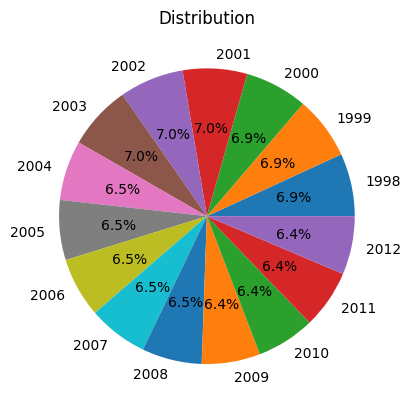

In [9]:
plt.pie(dist, labels=dist.index,autopct='%.1f%%')
plt.title("Distribution")
plt.show()

# QUESTION 4
## Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

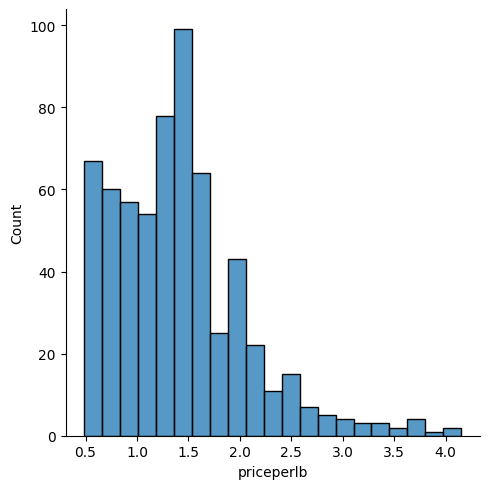

In [10]:
sns.displot(data=df1['priceperlb']);

# QUESTION 5
## Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

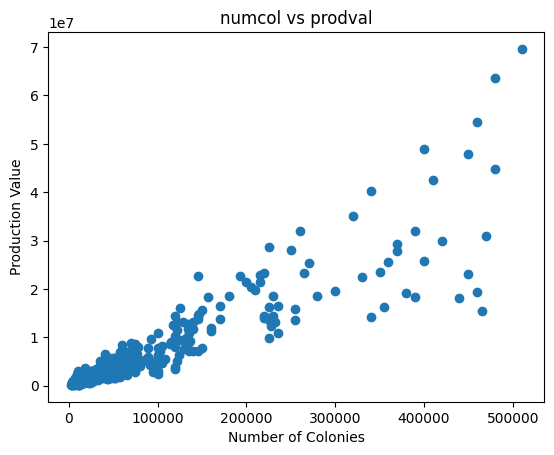

In [11]:
plt.scatter(df1['numcol'], df1['prodvalue'])
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value')
plt.title('numcol vs prodval')
plt.show()

There is a positive correlation between the number of colonies ad production value, as both increse with increase in number.

# QUESTION 6
## Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

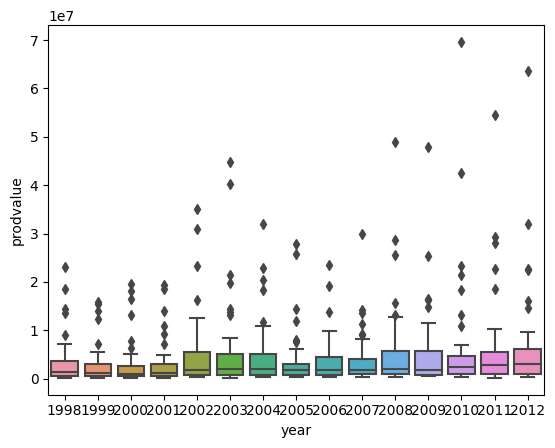

<Figure size 10000x7000 with 0 Axes>

In [25]:
sns.boxplot(x=df1['year'],y=df1['prodvalue'],linewidth=None)
plt.figure(figsize=(100,70))
plt.show()

# QUESTION 7
## Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

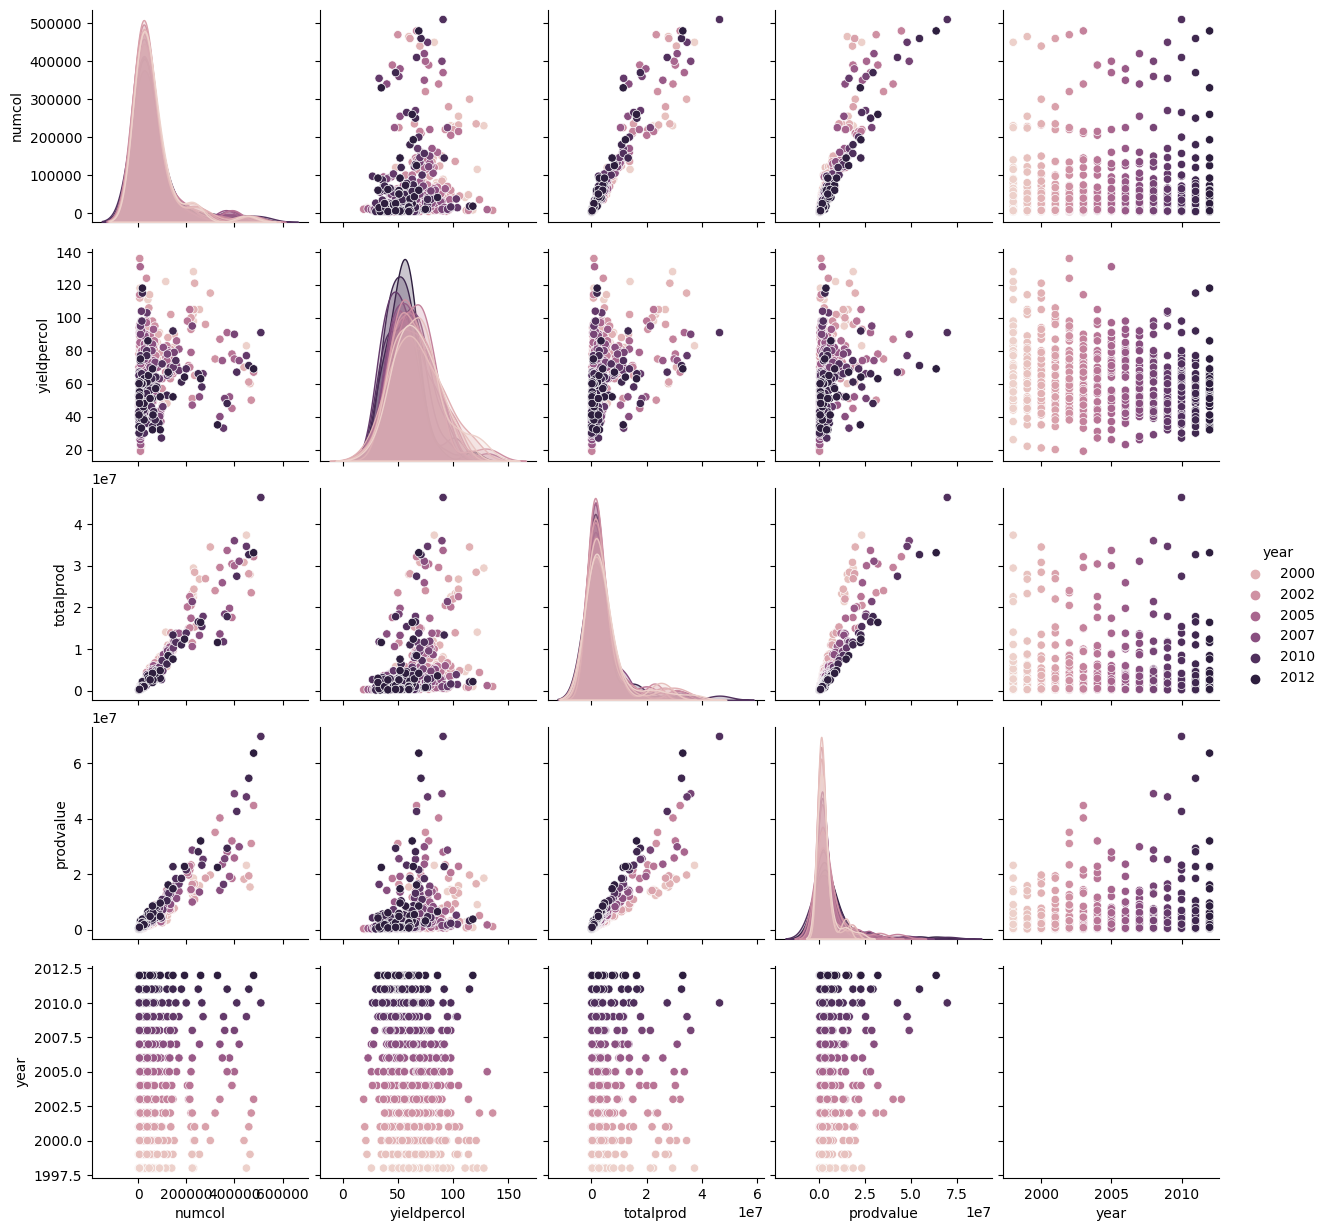

In [16]:
sns.pairplot(df1, vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year'], hue='year');

## QUESTION 8
## Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

In [21]:
correlation_matrix=df1[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()

correlation_matrix

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


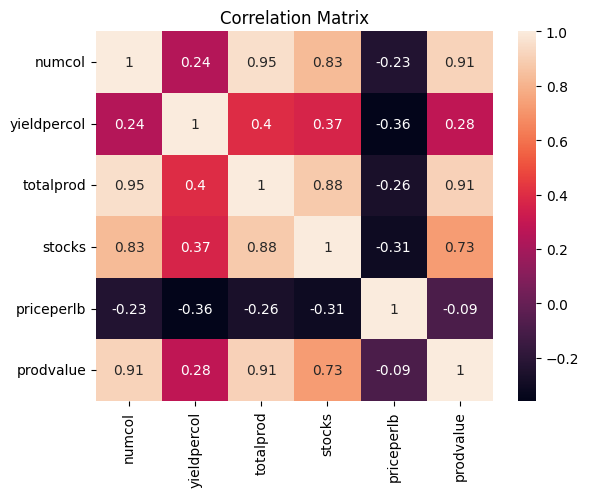

In [22]:
#plotting the heatmap

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

INFERENCE : 


---> The highest positive correlation value is between total production and numcol that explains the maximum positive relationship between them

---> The highest negative correlation value is between priceperlb and stocks that explains the maximum negative relationship between them